In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [3]:
from collections import defaultdict, Counter
import json

import matplotlib.pyplot as plt
import numpy as np
import torch
import transformers
import datasets

/home/karvsmech/.local/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
print(torch.cuda.is_available())

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'using device: {device}')

True
using device: cuda


In [5]:
def print_encoding(model_inputs, indent=4):
    indent_str = " " * indent
    print("{")
    for k, v in model_inputs.items():
        print(indent_str + k + ":")
        print(indent_str + indent_str + str(v))
    print("}")

In [6]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# initialize the tokenizer
tokenizer = AutoTokenizer.from_pretrained('siebert/sentiment-roberta-large-english')
# initialize the model
model = AutoModelForSequenceClassification.from_pretrained('siebert/sentiment-roberta-large-english')

In [7]:
inputs = "I'm excited to learn about Hugging Face Transformers!"
tokenized_inputs = tokenizer(inputs, return_tensors='pt')
tokenized_inputs

outputs = model(**tokenized_inputs)
outputs

labels = ['NEGATIVE', 'POSITIVE']
prediction = labels[torch.argmax(outputs.logits)]

print(f'the prediction is: {prediction}')

{'input_ids': tensor([[    0,   100,   437,  2283,     7,  1532,    59, 30581,  3923, 12346,
         34379,   328,     2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

SequenceClassifierOutput(loss=None, logits=tensor([[-3.7605,  2.9262]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

the prediction is: POSITIVE


In [8]:
# tokenizers

from transformers import DistilBertTokenizer, DistilBertTokenizerFast, AutoTokenizer

tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-cased')
print(tokenizer)

tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-cased')
print(tokenizer)

tokenizer = AutoTokenizer.from_pretrained('distilbert-base-cased')
print(tokenizer)

DistilBertTokenizer(name_or_path='distilbert-base-cased', vocab_size=28996, model_max_length=512, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True)
DistilBertTokenizerFast(name_or_path='distilbert-base-cased', vocab_size=28996, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True)
DistilBertTokenizerFast(name_or_path='distilbert-base-cased', vocab_size=28996, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True)


In [9]:
input_str = "Hugging Face transformers is great!"
tokenized_inputs = tokenizer(input_str)

print(tokenized_inputs)

{'input_ids': [101, 20164, 10932, 10289, 11303, 1468, 1110, 1632, 106, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [10]:
print_encoding(tokenized_inputs)

{
    input_ids:
        [101, 20164, 10932, 10289, 11303, 1468, 1110, 1632, 106, 102]
    attention_mask:
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
}


In [11]:
cls = [tokenizer.cls_token_id]
sep = [tokenizer.sep_token_id]

# tokenization happens in a few steps
input_tokens = tokenizer.tokenize(input_str)
input_ids = tokenizer.convert_tokens_to_ids(input_tokens)
input_ids_special_tokens = cls + input_ids + sep

decoded_str = tokenizer.decode(input_ids_special_tokens)


print("start:                   ", input_str)
print("tokenize:                ", input_tokens)
print("convert_tokens_to_ids:   ", input_ids)
print("add special tokens:      ", input_ids_special_tokens)
print("---------")
print("decode:                  ", decoded_str)

start:                    Hugging Face transformers is great!
tokenize:                 ['Hu', '##gging', 'Face', 'transform', '##ers', 'is', 'great', '!']
convert_tokens_to_ids:    [20164, 10932, 10289, 11303, 1468, 1110, 1632, 106]
add special tokens:       [101, 20164, 10932, 10289, 11303, 1468, 1110, 1632, 106, 102]
---------
decode:                   [CLS] Hugging Face transformers is great! [SEP]


In [12]:
# for fast tokenizers there is another option too
inputs = tokenizer._tokenizer.encode(input_str)

print(input_str)
print("-" * 5)
print(f"Number of tokens: {len(inputs)}")
print(f"Ids: {inputs.ids}")
print(f"Tokens: {inputs.tokens}")
print(f"special_tokens_mask: {inputs.special_tokens_mask}")

Hugging Face transformers is great!
-----
Number of tokens: 10
Ids: [101, 20164, 10932, 10289, 11303, 1468, 1110, 1632, 106, 102]
Tokens: ['[CLS]', 'Hu', '##gging', 'Face', 'transform', '##ers', 'is', 'great', '!', '[SEP]']
special_tokens_mask: [1, 0, 0, 0, 0, 0, 0, 0, 0, 1]


In [13]:
# the tokenizer can return pytorch tensors
model_inputs = tokenizer(input_str, return_tensors='pt')
print('PyTorch Tensors:')
print_encoding(model_inputs)

PyTorch Tensors:
{
    input_ids:
        tensor([[  101, 20164, 10932, 10289, 11303,  1468,  1110,  1632,   106,   102]])
    attention_mask:
        tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])
}


In [14]:
# we can pass multiple strings to the tokenizer and pad them as we need.
model_inputs = tokenizer(["Hugging Face Transfomers is great!",
                         "The quick brown fox jumps over the lazy dog. Then the dog got up and ran away because she didn't like foxes.",
                         ],
                        return_tensors='pt', 
                        padding=True, 
                        truncation=True)
print(f"Pad token: {tokenizer.pad_token} | Pad token id: {tokenizer.pad_token_id}")
print("Padding:")
print_encoding(model_inputs)

Pad token: [PAD] | Pad token id: 0
Padding:
{
    input_ids:
        tensor([[  101, 20164, 10932, 10289, 13809, 14467, 19134,  1110,  1632,   106,
           102,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0],
        [  101,  1109,  3613,  3058, 17594, 15457,  1166,  1103, 16688,  3676,
           119,  1599,  1103,  3676,  1400,  1146,  1105,  1868,  1283,  1272,
          1131,  1238,   112,   189,  1176, 17594,  1279,   119,   102]])
    attention_mask:
        tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1]])
}


In [15]:
tokenizer.batch_decode(model_inputs.input_ids)

['[CLS] Hugging Face Transfomers is great! [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]',
 "[CLS] The quick brown fox jumps over the lazy dog. Then the dog got up and ran away because she didn't like foxes. [SEP]"]

In [16]:
tokenizer.batch_decode(model_inputs.input_ids, skip_special_tokens=True)

['Hugging Face Transfomers is great!',
 "The quick brown fox jumps over the lazy dog. Then the dog got up and ran away because she didn't like foxes."]

In [17]:
# Models

In [18]:
from transformers import AutoTokenizer, AutoModel

# initialize the tokenizer
tokenizer = AutoTokenizer.from_pretrained('siebert/sentiment-roberta-large-english')
# initialize the model
# when you need the model for just getting its representations.
model_rep = AutoModel.from_pretrained('siebert/sentiment-roberta-large-english')

# when you need the model with a particular head. 
# For instance, in this case we have sequence classification head for sentiment analysis.
model_head = AutoModelForSequenceClassification.from_pretrained('siebert/sentiment-roberta-large-english')

Some weights of the model checkpoint at siebert/sentiment-roberta-large-english were not used when initializing RobertaModel: ['classifier.out_proj.bias', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.dense.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [19]:
inputs = "I'm excited to learn about Hugging Face Transformers!"
model_inputs = tokenizer(inputs, return_tensors="pt")
model_inputs

outputs_representation = model_rep(**model_inputs)
outputs_representation

outputs_sequence_classification_head = model_head(**model_inputs)
outputs_sequence_classification_head

{'input_ids': tensor([[    0,   100,   437,  2283,     7,  1532,    59, 30581,  3923, 12346,
         34379,   328,     2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

BaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=tensor([[[-0.0525, -0.1342, -0.5488,  ...,  0.1036,  0.0879, -0.2249],
         [-0.0568, -0.1349, -0.5527,  ...,  0.1023,  0.0883, -0.2277],
         [-0.0568, -0.1349, -0.5525,  ...,  0.1026,  0.0884, -0.2279],
         ...,
         [-0.0576, -0.1346, -0.5536,  ...,  0.1007,  0.0885, -0.2269],
         [-0.0565, -0.1349, -0.5526,  ...,  0.1028,  0.0883, -0.2282],
         [-0.0578, -0.1352, -0.5541,  ...,  0.1014,  0.0881, -0.2279]]],
       grad_fn=<NativeLayerNormBackward0>), pooler_output=tensor([[-0.3097,  0.2555,  0.5330,  ...,  0.2384,  0.1918, -0.5362]],
       grad_fn=<TanhBackward0>), hidden_states=None, past_key_values=None, attentions=None, cross_attentions=None)

SequenceClassifierOutput(loss=None, logits=tensor([[-3.7605,  2.9262]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [20]:
from transformers import AutoModelForSequenceClassification, DistilBertForSequenceClassification

check_point = 'distilbert-base-cased'
model_auto = AutoModelForSequenceClassification.from_pretrained(check_point)
# model_bert = DistilBertForSequenceClassification.from_pretrained(check_point, num_labels = 2)

tokenizer = AutoTokenizer.from_pretrained(check_point)

input_str = "the movie was good"
tokenized_inputs = tokenizer(input_str, return_tensors='pt')
tokenized_inputs

model_outputs = model_auto(**tokenized_inputs)
model_outputs

print(f"Distribution over labels: {torch.softmax(model_outputs.logits, dim=1)}")

labels = ['NEGATIVE', 'POSITIVE']
print(labels[torch.argmax(model_outputs.logits)])

Some weights of the model checkpoint at distilbert-base-cased were not used when initializing DistilBertForSequenceClassification: ['vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['classifier.weight', 'pre_classifier.bias', 'classifier.bias', 'pre_classifier.weight

{'input_ids': tensor([[ 101, 1103, 2523, 1108, 1363,  102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1]])}

SequenceClassifierOutput(loss=None, logits=tensor([[0.0998, 0.0674]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

Distribution over labels: tensor([[0.5081, 0.4919]], grad_fn=<SoftmaxBackward0>)
NEGATIVE


In [21]:
from transformers import AutoModelForSequenceClassification, DistilBertForSequenceClassification

check_point = 'siebert/sentiment-roberta-large-english'
model_auto = AutoModelForSequenceClassification.from_pretrained(check_point)
# model_bert = DistilBertForSequenceClassification.from_pretrained(check_point, num_labels = 2)

tokenizer = AutoTokenizer.from_pretrained(check_point)

input_str = "the movie was good"
tokenized_inputs = tokenizer(input_str, return_tensors='pt')
tokenized_inputs

model_outputs = model_auto(**tokenized_inputs)
model_outputs

print(f"Distribution over labels: {torch.softmax(model_outputs.logits, dim=1)}")

labels = ['NEGATIVE', 'POSITIVE']
print(labels[torch.argmax(model_outputs.logits)])

{'input_ids': tensor([[   0,  627, 1569,   21,  205,    2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1]])}

SequenceClassifierOutput(loss=None, logits=tensor([[-3.6781,  2.8360]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

Distribution over labels: tensor([[0.0015, 0.9985]], grad_fn=<SoftmaxBackward0>)
POSITIVE


In [22]:
label = torch.tensor([1])
loss = torch.nn.functional.cross_entropy(model_outputs.logits, label)
print(loss)

loss.backward()

tensor(0.0015, grad_fn=<NllLossBackward0>)


In [23]:
list(model.named_parameters())[0]

('roberta.embeddings.word_embeddings.weight',
 Parameter containing:
 tensor([[-0.1397, -0.0087,  0.0402,  ...,  0.0502, -0.0065, -0.0361],
         [ 0.0078, -0.0156,  0.0156,  ..., -0.0156,  0.0230,  0.0156],
         [-0.0820, -0.0008, -0.1182,  ...,  0.1095,  0.0693, -0.0350],
         ...,
         [ 0.0393,  0.0031,  0.0465,  ..., -0.0240, -0.0505,  0.0342],
         [ 0.0498,  0.0272,  0.0412,  ..., -0.0370, -0.0100,  0.0071],
         [-0.0149, -0.0113, -0.0222,  ...,  0.0440,  0.0116, -0.0330]],
        requires_grad=True))

In [24]:
# to calculate the loss, we need to pass in the label
input_str = "Hugging Face transformers is great!"

model_inputs = tokenizer(input_str, return_tensors='pt')

labels= ['NEGATIVE', 'POSITIVE']

model_inputs['labels'] = torch.tensor([1])

model_outputs = model_auto(**model_inputs)

print(model_inputs)
print()
print(model_outputs)
print()
print(f"Model predictions: {labels[model_outputs.logits.argmax()]}")

{'input_ids': tensor([[    0, 40710,  3923, 12346,  7891,   268,    16,   372,   328,     2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]), 'labels': tensor([1])}

SequenceClassifierOutput(loss=tensor(0.0014, grad_fn=<NllLossBackward0>), logits=tensor([[-3.7117,  2.8718]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

Model predictions: POSITIVE


In [25]:
# getting the hidden states and attention weights of the model
from transformers import AutoModel

input_str = "Hugging Face transformers is great!"

check_point = 'distilbert-base-cased'
tokenizer = AutoTokenizer.from_pretrained(check_point)

model = AutoModel.from_pretrained(check_point, output_attentions=True, output_hidden_states=True)
model.eval()


model_inputs = tokenizer(input_str, return_tensors='pt')
with torch.no_grad():
    model_outputs = model(**model_inputs)
    
print("Hidden state size (per layer): ", model_outputs.hidden_states[0].shape)
print("Attention head size (per layer): ", model_outputs.attentions[0].shape) # (layer, batch, query_word_idx, key_word_idx)

Some weights of the model checkpoint at distilbert-base-cased were not used when initializing DistilBertModel: ['vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


DistilBertModel(
  (embeddings): Embeddings(
    (word_embeddings): Embedding(28996, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer): Transformer(
    (layer): ModuleList(
      (0-5): 6 x TransformerBlock(
        (attention): MultiHeadSelfAttention(
          (dropout): Dropout(p=0.1, inplace=False)
          (q_lin): Linear(in_features=768, out_features=768, bias=True)
          (k_lin): Linear(in_features=768, out_features=768, bias=True)
          (v_lin): Linear(in_features=768, out_features=768, bias=True)
          (out_lin): Linear(in_features=768, out_features=768, bias=True)
        )
        (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (ffn): FFN(
          (dropout): Dropout(p=0.1, inplace=False)
          (lin1): Linear(in_features=768, out_features=3072, bias=True)
          (lin2): Li

Hidden state size (per layer):  torch.Size([1, 10, 768])
Attention head size (per layer):  torch.Size([1, 12, 10, 10])


['[CLS]', 'Hu', '##gging', 'Face', 'transform', '##ers', 'is', 'great', '!', '[SEP]']


[Text(0, 0, '[CLS]'),
 Text(1, 0, 'Hu'),
 Text(2, 0, '##gging'),
 Text(3, 0, 'Face'),
 Text(4, 0, 'transform'),
 Text(5, 0, '##ers'),
 Text(6, 0, 'is'),
 Text(7, 0, 'great'),
 Text(8, 0, '!'),
 Text(9, 0, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(0, 1, 'Hu'),
 Text(0, 2, '##gging'),
 Text(0, 3, 'Face'),
 Text(0, 4, 'transform'),
 Text(0, 5, '##ers'),
 Text(0, 6, 'is'),
 Text(0, 7, 'great'),
 Text(0, 8, '!'),
 Text(0, 9, '[SEP]')]

[Text(0, 0.5, 'layer=0')]

[Text(0, 0, '[CLS]'),
 Text(1, 0, 'Hu'),
 Text(2, 0, '##gging'),
 Text(3, 0, 'Face'),
 Text(4, 0, 'transform'),
 Text(5, 0, '##ers'),
 Text(6, 0, 'is'),
 Text(7, 0, 'great'),
 Text(8, 0, '!'),
 Text(9, 0, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(0, 1, 'Hu'),
 Text(0, 2, '##gging'),
 Text(0, 3, 'Face'),
 Text(0, 4, 'transform'),
 Text(0, 5, '##ers'),
 Text(0, 6, 'is'),
 Text(0, 7, 'great'),
 Text(0, 8, '!'),
 Text(0, 9, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(1, 0, 'Hu'),
 Text(2, 0, '##gging'),
 Text(3, 0, 'Face'),
 Text(4, 0, 'transform'),
 Text(5, 0, '##ers'),
 Text(6, 0, 'is'),
 Text(7, 0, 'great'),
 Text(8, 0, '!'),
 Text(9, 0, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(0, 1, 'Hu'),
 Text(0, 2, '##gging'),
 Text(0, 3, 'Face'),
 Text(0, 4, 'transform'),
 Text(0, 5, '##ers'),
 Text(0, 6, 'is'),
 Text(0, 7, 'great'),
 Text(0, 8, '!'),
 Text(0, 9, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(1, 0, 'Hu'),
 Text(2, 0, '##gging'),
 Text(3, 0, 'Face'),
 Text(4, 0, 'transform'),
 Text(5, 0, '##ers'),
 Text(6, 0, 'is'),
 Text(7, 0, 'great'),
 Text(8, 0, '!'),
 Text(9, 0, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(0, 1, 'Hu'),
 Text(0, 2, '##gging'),
 Text(0, 3, 'Face'),
 Text(0, 4, 'transform'),
 Text(0, 5, '##ers'),
 Text(0, 6, 'is'),
 Text(0, 7, 'great'),
 Text(0, 8, '!'),
 Text(0, 9, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(1, 0, 'Hu'),
 Text(2, 0, '##gging'),
 Text(3, 0, 'Face'),
 Text(4, 0, 'transform'),
 Text(5, 0, '##ers'),
 Text(6, 0, 'is'),
 Text(7, 0, 'great'),
 Text(8, 0, '!'),
 Text(9, 0, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(0, 1, 'Hu'),
 Text(0, 2, '##gging'),
 Text(0, 3, 'Face'),
 Text(0, 4, 'transform'),
 Text(0, 5, '##ers'),
 Text(0, 6, 'is'),
 Text(0, 7, 'great'),
 Text(0, 8, '!'),
 Text(0, 9, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(1, 0, 'Hu'),
 Text(2, 0, '##gging'),
 Text(3, 0, 'Face'),
 Text(4, 0, 'transform'),
 Text(5, 0, '##ers'),
 Text(6, 0, 'is'),
 Text(7, 0, 'great'),
 Text(8, 0, '!'),
 Text(9, 0, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(0, 1, 'Hu'),
 Text(0, 2, '##gging'),
 Text(0, 3, 'Face'),
 Text(0, 4, 'transform'),
 Text(0, 5, '##ers'),
 Text(0, 6, 'is'),
 Text(0, 7, 'great'),
 Text(0, 8, '!'),
 Text(0, 9, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(1, 0, 'Hu'),
 Text(2, 0, '##gging'),
 Text(3, 0, 'Face'),
 Text(4, 0, 'transform'),
 Text(5, 0, '##ers'),
 Text(6, 0, 'is'),
 Text(7, 0, 'great'),
 Text(8, 0, '!'),
 Text(9, 0, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(0, 1, 'Hu'),
 Text(0, 2, '##gging'),
 Text(0, 3, 'Face'),
 Text(0, 4, 'transform'),
 Text(0, 5, '##ers'),
 Text(0, 6, 'is'),
 Text(0, 7, 'great'),
 Text(0, 8, '!'),
 Text(0, 9, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(1, 0, 'Hu'),
 Text(2, 0, '##gging'),
 Text(3, 0, 'Face'),
 Text(4, 0, 'transform'),
 Text(5, 0, '##ers'),
 Text(6, 0, 'is'),
 Text(7, 0, 'great'),
 Text(8, 0, '!'),
 Text(9, 0, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(0, 1, 'Hu'),
 Text(0, 2, '##gging'),
 Text(0, 3, 'Face'),
 Text(0, 4, 'transform'),
 Text(0, 5, '##ers'),
 Text(0, 6, 'is'),
 Text(0, 7, 'great'),
 Text(0, 8, '!'),
 Text(0, 9, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(1, 0, 'Hu'),
 Text(2, 0, '##gging'),
 Text(3, 0, 'Face'),
 Text(4, 0, 'transform'),
 Text(5, 0, '##ers'),
 Text(6, 0, 'is'),
 Text(7, 0, 'great'),
 Text(8, 0, '!'),
 Text(9, 0, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(0, 1, 'Hu'),
 Text(0, 2, '##gging'),
 Text(0, 3, 'Face'),
 Text(0, 4, 'transform'),
 Text(0, 5, '##ers'),
 Text(0, 6, 'is'),
 Text(0, 7, 'great'),
 Text(0, 8, '!'),
 Text(0, 9, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(1, 0, 'Hu'),
 Text(2, 0, '##gging'),
 Text(3, 0, 'Face'),
 Text(4, 0, 'transform'),
 Text(5, 0, '##ers'),
 Text(6, 0, 'is'),
 Text(7, 0, 'great'),
 Text(8, 0, '!'),
 Text(9, 0, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(0, 1, 'Hu'),
 Text(0, 2, '##gging'),
 Text(0, 3, 'Face'),
 Text(0, 4, 'transform'),
 Text(0, 5, '##ers'),
 Text(0, 6, 'is'),
 Text(0, 7, 'great'),
 Text(0, 8, '!'),
 Text(0, 9, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(1, 0, 'Hu'),
 Text(2, 0, '##gging'),
 Text(3, 0, 'Face'),
 Text(4, 0, 'transform'),
 Text(5, 0, '##ers'),
 Text(6, 0, 'is'),
 Text(7, 0, 'great'),
 Text(8, 0, '!'),
 Text(9, 0, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(0, 1, 'Hu'),
 Text(0, 2, '##gging'),
 Text(0, 3, 'Face'),
 Text(0, 4, 'transform'),
 Text(0, 5, '##ers'),
 Text(0, 6, 'is'),
 Text(0, 7, 'great'),
 Text(0, 8, '!'),
 Text(0, 9, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(1, 0, 'Hu'),
 Text(2, 0, '##gging'),
 Text(3, 0, 'Face'),
 Text(4, 0, 'transform'),
 Text(5, 0, '##ers'),
 Text(6, 0, 'is'),
 Text(7, 0, 'great'),
 Text(8, 0, '!'),
 Text(9, 0, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(0, 1, 'Hu'),
 Text(0, 2, '##gging'),
 Text(0, 3, 'Face'),
 Text(0, 4, 'transform'),
 Text(0, 5, '##ers'),
 Text(0, 6, 'is'),
 Text(0, 7, 'great'),
 Text(0, 8, '!'),
 Text(0, 9, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(1, 0, 'Hu'),
 Text(2, 0, '##gging'),
 Text(3, 0, 'Face'),
 Text(4, 0, 'transform'),
 Text(5, 0, '##ers'),
 Text(6, 0, 'is'),
 Text(7, 0, 'great'),
 Text(8, 0, '!'),
 Text(9, 0, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(0, 1, 'Hu'),
 Text(0, 2, '##gging'),
 Text(0, 3, 'Face'),
 Text(0, 4, 'transform'),
 Text(0, 5, '##ers'),
 Text(0, 6, 'is'),
 Text(0, 7, 'great'),
 Text(0, 8, '!'),
 Text(0, 9, '[SEP]')]

[Text(0, 0.5, 'layer=1')]

[Text(0, 0, '[CLS]'),
 Text(1, 0, 'Hu'),
 Text(2, 0, '##gging'),
 Text(3, 0, 'Face'),
 Text(4, 0, 'transform'),
 Text(5, 0, '##ers'),
 Text(6, 0, 'is'),
 Text(7, 0, 'great'),
 Text(8, 0, '!'),
 Text(9, 0, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(0, 1, 'Hu'),
 Text(0, 2, '##gging'),
 Text(0, 3, 'Face'),
 Text(0, 4, 'transform'),
 Text(0, 5, '##ers'),
 Text(0, 6, 'is'),
 Text(0, 7, 'great'),
 Text(0, 8, '!'),
 Text(0, 9, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(1, 0, 'Hu'),
 Text(2, 0, '##gging'),
 Text(3, 0, 'Face'),
 Text(4, 0, 'transform'),
 Text(5, 0, '##ers'),
 Text(6, 0, 'is'),
 Text(7, 0, 'great'),
 Text(8, 0, '!'),
 Text(9, 0, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(0, 1, 'Hu'),
 Text(0, 2, '##gging'),
 Text(0, 3, 'Face'),
 Text(0, 4, 'transform'),
 Text(0, 5, '##ers'),
 Text(0, 6, 'is'),
 Text(0, 7, 'great'),
 Text(0, 8, '!'),
 Text(0, 9, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(1, 0, 'Hu'),
 Text(2, 0, '##gging'),
 Text(3, 0, 'Face'),
 Text(4, 0, 'transform'),
 Text(5, 0, '##ers'),
 Text(6, 0, 'is'),
 Text(7, 0, 'great'),
 Text(8, 0, '!'),
 Text(9, 0, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(0, 1, 'Hu'),
 Text(0, 2, '##gging'),
 Text(0, 3, 'Face'),
 Text(0, 4, 'transform'),
 Text(0, 5, '##ers'),
 Text(0, 6, 'is'),
 Text(0, 7, 'great'),
 Text(0, 8, '!'),
 Text(0, 9, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(1, 0, 'Hu'),
 Text(2, 0, '##gging'),
 Text(3, 0, 'Face'),
 Text(4, 0, 'transform'),
 Text(5, 0, '##ers'),
 Text(6, 0, 'is'),
 Text(7, 0, 'great'),
 Text(8, 0, '!'),
 Text(9, 0, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(0, 1, 'Hu'),
 Text(0, 2, '##gging'),
 Text(0, 3, 'Face'),
 Text(0, 4, 'transform'),
 Text(0, 5, '##ers'),
 Text(0, 6, 'is'),
 Text(0, 7, 'great'),
 Text(0, 8, '!'),
 Text(0, 9, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(1, 0, 'Hu'),
 Text(2, 0, '##gging'),
 Text(3, 0, 'Face'),
 Text(4, 0, 'transform'),
 Text(5, 0, '##ers'),
 Text(6, 0, 'is'),
 Text(7, 0, 'great'),
 Text(8, 0, '!'),
 Text(9, 0, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(0, 1, 'Hu'),
 Text(0, 2, '##gging'),
 Text(0, 3, 'Face'),
 Text(0, 4, 'transform'),
 Text(0, 5, '##ers'),
 Text(0, 6, 'is'),
 Text(0, 7, 'great'),
 Text(0, 8, '!'),
 Text(0, 9, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(1, 0, 'Hu'),
 Text(2, 0, '##gging'),
 Text(3, 0, 'Face'),
 Text(4, 0, 'transform'),
 Text(5, 0, '##ers'),
 Text(6, 0, 'is'),
 Text(7, 0, 'great'),
 Text(8, 0, '!'),
 Text(9, 0, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(0, 1, 'Hu'),
 Text(0, 2, '##gging'),
 Text(0, 3, 'Face'),
 Text(0, 4, 'transform'),
 Text(0, 5, '##ers'),
 Text(0, 6, 'is'),
 Text(0, 7, 'great'),
 Text(0, 8, '!'),
 Text(0, 9, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(1, 0, 'Hu'),
 Text(2, 0, '##gging'),
 Text(3, 0, 'Face'),
 Text(4, 0, 'transform'),
 Text(5, 0, '##ers'),
 Text(6, 0, 'is'),
 Text(7, 0, 'great'),
 Text(8, 0, '!'),
 Text(9, 0, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(0, 1, 'Hu'),
 Text(0, 2, '##gging'),
 Text(0, 3, 'Face'),
 Text(0, 4, 'transform'),
 Text(0, 5, '##ers'),
 Text(0, 6, 'is'),
 Text(0, 7, 'great'),
 Text(0, 8, '!'),
 Text(0, 9, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(1, 0, 'Hu'),
 Text(2, 0, '##gging'),
 Text(3, 0, 'Face'),
 Text(4, 0, 'transform'),
 Text(5, 0, '##ers'),
 Text(6, 0, 'is'),
 Text(7, 0, 'great'),
 Text(8, 0, '!'),
 Text(9, 0, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(0, 1, 'Hu'),
 Text(0, 2, '##gging'),
 Text(0, 3, 'Face'),
 Text(0, 4, 'transform'),
 Text(0, 5, '##ers'),
 Text(0, 6, 'is'),
 Text(0, 7, 'great'),
 Text(0, 8, '!'),
 Text(0, 9, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(1, 0, 'Hu'),
 Text(2, 0, '##gging'),
 Text(3, 0, 'Face'),
 Text(4, 0, 'transform'),
 Text(5, 0, '##ers'),
 Text(6, 0, 'is'),
 Text(7, 0, 'great'),
 Text(8, 0, '!'),
 Text(9, 0, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(0, 1, 'Hu'),
 Text(0, 2, '##gging'),
 Text(0, 3, 'Face'),
 Text(0, 4, 'transform'),
 Text(0, 5, '##ers'),
 Text(0, 6, 'is'),
 Text(0, 7, 'great'),
 Text(0, 8, '!'),
 Text(0, 9, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(1, 0, 'Hu'),
 Text(2, 0, '##gging'),
 Text(3, 0, 'Face'),
 Text(4, 0, 'transform'),
 Text(5, 0, '##ers'),
 Text(6, 0, 'is'),
 Text(7, 0, 'great'),
 Text(8, 0, '!'),
 Text(9, 0, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(0, 1, 'Hu'),
 Text(0, 2, '##gging'),
 Text(0, 3, 'Face'),
 Text(0, 4, 'transform'),
 Text(0, 5, '##ers'),
 Text(0, 6, 'is'),
 Text(0, 7, 'great'),
 Text(0, 8, '!'),
 Text(0, 9, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(1, 0, 'Hu'),
 Text(2, 0, '##gging'),
 Text(3, 0, 'Face'),
 Text(4, 0, 'transform'),
 Text(5, 0, '##ers'),
 Text(6, 0, 'is'),
 Text(7, 0, 'great'),
 Text(8, 0, '!'),
 Text(9, 0, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(0, 1, 'Hu'),
 Text(0, 2, '##gging'),
 Text(0, 3, 'Face'),
 Text(0, 4, 'transform'),
 Text(0, 5, '##ers'),
 Text(0, 6, 'is'),
 Text(0, 7, 'great'),
 Text(0, 8, '!'),
 Text(0, 9, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(1, 0, 'Hu'),
 Text(2, 0, '##gging'),
 Text(3, 0, 'Face'),
 Text(4, 0, 'transform'),
 Text(5, 0, '##ers'),
 Text(6, 0, 'is'),
 Text(7, 0, 'great'),
 Text(8, 0, '!'),
 Text(9, 0, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(0, 1, 'Hu'),
 Text(0, 2, '##gging'),
 Text(0, 3, 'Face'),
 Text(0, 4, 'transform'),
 Text(0, 5, '##ers'),
 Text(0, 6, 'is'),
 Text(0, 7, 'great'),
 Text(0, 8, '!'),
 Text(0, 9, '[SEP]')]

[Text(0, 0.5, 'layer=2')]

[Text(0, 0, '[CLS]'),
 Text(1, 0, 'Hu'),
 Text(2, 0, '##gging'),
 Text(3, 0, 'Face'),
 Text(4, 0, 'transform'),
 Text(5, 0, '##ers'),
 Text(6, 0, 'is'),
 Text(7, 0, 'great'),
 Text(8, 0, '!'),
 Text(9, 0, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(0, 1, 'Hu'),
 Text(0, 2, '##gging'),
 Text(0, 3, 'Face'),
 Text(0, 4, 'transform'),
 Text(0, 5, '##ers'),
 Text(0, 6, 'is'),
 Text(0, 7, 'great'),
 Text(0, 8, '!'),
 Text(0, 9, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(1, 0, 'Hu'),
 Text(2, 0, '##gging'),
 Text(3, 0, 'Face'),
 Text(4, 0, 'transform'),
 Text(5, 0, '##ers'),
 Text(6, 0, 'is'),
 Text(7, 0, 'great'),
 Text(8, 0, '!'),
 Text(9, 0, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(0, 1, 'Hu'),
 Text(0, 2, '##gging'),
 Text(0, 3, 'Face'),
 Text(0, 4, 'transform'),
 Text(0, 5, '##ers'),
 Text(0, 6, 'is'),
 Text(0, 7, 'great'),
 Text(0, 8, '!'),
 Text(0, 9, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(1, 0, 'Hu'),
 Text(2, 0, '##gging'),
 Text(3, 0, 'Face'),
 Text(4, 0, 'transform'),
 Text(5, 0, '##ers'),
 Text(6, 0, 'is'),
 Text(7, 0, 'great'),
 Text(8, 0, '!'),
 Text(9, 0, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(0, 1, 'Hu'),
 Text(0, 2, '##gging'),
 Text(0, 3, 'Face'),
 Text(0, 4, 'transform'),
 Text(0, 5, '##ers'),
 Text(0, 6, 'is'),
 Text(0, 7, 'great'),
 Text(0, 8, '!'),
 Text(0, 9, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(1, 0, 'Hu'),
 Text(2, 0, '##gging'),
 Text(3, 0, 'Face'),
 Text(4, 0, 'transform'),
 Text(5, 0, '##ers'),
 Text(6, 0, 'is'),
 Text(7, 0, 'great'),
 Text(8, 0, '!'),
 Text(9, 0, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(0, 1, 'Hu'),
 Text(0, 2, '##gging'),
 Text(0, 3, 'Face'),
 Text(0, 4, 'transform'),
 Text(0, 5, '##ers'),
 Text(0, 6, 'is'),
 Text(0, 7, 'great'),
 Text(0, 8, '!'),
 Text(0, 9, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(1, 0, 'Hu'),
 Text(2, 0, '##gging'),
 Text(3, 0, 'Face'),
 Text(4, 0, 'transform'),
 Text(5, 0, '##ers'),
 Text(6, 0, 'is'),
 Text(7, 0, 'great'),
 Text(8, 0, '!'),
 Text(9, 0, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(0, 1, 'Hu'),
 Text(0, 2, '##gging'),
 Text(0, 3, 'Face'),
 Text(0, 4, 'transform'),
 Text(0, 5, '##ers'),
 Text(0, 6, 'is'),
 Text(0, 7, 'great'),
 Text(0, 8, '!'),
 Text(0, 9, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(1, 0, 'Hu'),
 Text(2, 0, '##gging'),
 Text(3, 0, 'Face'),
 Text(4, 0, 'transform'),
 Text(5, 0, '##ers'),
 Text(6, 0, 'is'),
 Text(7, 0, 'great'),
 Text(8, 0, '!'),
 Text(9, 0, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(0, 1, 'Hu'),
 Text(0, 2, '##gging'),
 Text(0, 3, 'Face'),
 Text(0, 4, 'transform'),
 Text(0, 5, '##ers'),
 Text(0, 6, 'is'),
 Text(0, 7, 'great'),
 Text(0, 8, '!'),
 Text(0, 9, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(1, 0, 'Hu'),
 Text(2, 0, '##gging'),
 Text(3, 0, 'Face'),
 Text(4, 0, 'transform'),
 Text(5, 0, '##ers'),
 Text(6, 0, 'is'),
 Text(7, 0, 'great'),
 Text(8, 0, '!'),
 Text(9, 0, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(0, 1, 'Hu'),
 Text(0, 2, '##gging'),
 Text(0, 3, 'Face'),
 Text(0, 4, 'transform'),
 Text(0, 5, '##ers'),
 Text(0, 6, 'is'),
 Text(0, 7, 'great'),
 Text(0, 8, '!'),
 Text(0, 9, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(1, 0, 'Hu'),
 Text(2, 0, '##gging'),
 Text(3, 0, 'Face'),
 Text(4, 0, 'transform'),
 Text(5, 0, '##ers'),
 Text(6, 0, 'is'),
 Text(7, 0, 'great'),
 Text(8, 0, '!'),
 Text(9, 0, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(0, 1, 'Hu'),
 Text(0, 2, '##gging'),
 Text(0, 3, 'Face'),
 Text(0, 4, 'transform'),
 Text(0, 5, '##ers'),
 Text(0, 6, 'is'),
 Text(0, 7, 'great'),
 Text(0, 8, '!'),
 Text(0, 9, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(1, 0, 'Hu'),
 Text(2, 0, '##gging'),
 Text(3, 0, 'Face'),
 Text(4, 0, 'transform'),
 Text(5, 0, '##ers'),
 Text(6, 0, 'is'),
 Text(7, 0, 'great'),
 Text(8, 0, '!'),
 Text(9, 0, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(0, 1, 'Hu'),
 Text(0, 2, '##gging'),
 Text(0, 3, 'Face'),
 Text(0, 4, 'transform'),
 Text(0, 5, '##ers'),
 Text(0, 6, 'is'),
 Text(0, 7, 'great'),
 Text(0, 8, '!'),
 Text(0, 9, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(1, 0, 'Hu'),
 Text(2, 0, '##gging'),
 Text(3, 0, 'Face'),
 Text(4, 0, 'transform'),
 Text(5, 0, '##ers'),
 Text(6, 0, 'is'),
 Text(7, 0, 'great'),
 Text(8, 0, '!'),
 Text(9, 0, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(0, 1, 'Hu'),
 Text(0, 2, '##gging'),
 Text(0, 3, 'Face'),
 Text(0, 4, 'transform'),
 Text(0, 5, '##ers'),
 Text(0, 6, 'is'),
 Text(0, 7, 'great'),
 Text(0, 8, '!'),
 Text(0, 9, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(1, 0, 'Hu'),
 Text(2, 0, '##gging'),
 Text(3, 0, 'Face'),
 Text(4, 0, 'transform'),
 Text(5, 0, '##ers'),
 Text(6, 0, 'is'),
 Text(7, 0, 'great'),
 Text(8, 0, '!'),
 Text(9, 0, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(0, 1, 'Hu'),
 Text(0, 2, '##gging'),
 Text(0, 3, 'Face'),
 Text(0, 4, 'transform'),
 Text(0, 5, '##ers'),
 Text(0, 6, 'is'),
 Text(0, 7, 'great'),
 Text(0, 8, '!'),
 Text(0, 9, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(1, 0, 'Hu'),
 Text(2, 0, '##gging'),
 Text(3, 0, 'Face'),
 Text(4, 0, 'transform'),
 Text(5, 0, '##ers'),
 Text(6, 0, 'is'),
 Text(7, 0, 'great'),
 Text(8, 0, '!'),
 Text(9, 0, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(0, 1, 'Hu'),
 Text(0, 2, '##gging'),
 Text(0, 3, 'Face'),
 Text(0, 4, 'transform'),
 Text(0, 5, '##ers'),
 Text(0, 6, 'is'),
 Text(0, 7, 'great'),
 Text(0, 8, '!'),
 Text(0, 9, '[SEP]')]

[Text(0, 0.5, 'layer=3')]

[Text(0, 0, '[CLS]'),
 Text(1, 0, 'Hu'),
 Text(2, 0, '##gging'),
 Text(3, 0, 'Face'),
 Text(4, 0, 'transform'),
 Text(5, 0, '##ers'),
 Text(6, 0, 'is'),
 Text(7, 0, 'great'),
 Text(8, 0, '!'),
 Text(9, 0, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(0, 1, 'Hu'),
 Text(0, 2, '##gging'),
 Text(0, 3, 'Face'),
 Text(0, 4, 'transform'),
 Text(0, 5, '##ers'),
 Text(0, 6, 'is'),
 Text(0, 7, 'great'),
 Text(0, 8, '!'),
 Text(0, 9, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(1, 0, 'Hu'),
 Text(2, 0, '##gging'),
 Text(3, 0, 'Face'),
 Text(4, 0, 'transform'),
 Text(5, 0, '##ers'),
 Text(6, 0, 'is'),
 Text(7, 0, 'great'),
 Text(8, 0, '!'),
 Text(9, 0, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(0, 1, 'Hu'),
 Text(0, 2, '##gging'),
 Text(0, 3, 'Face'),
 Text(0, 4, 'transform'),
 Text(0, 5, '##ers'),
 Text(0, 6, 'is'),
 Text(0, 7, 'great'),
 Text(0, 8, '!'),
 Text(0, 9, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(1, 0, 'Hu'),
 Text(2, 0, '##gging'),
 Text(3, 0, 'Face'),
 Text(4, 0, 'transform'),
 Text(5, 0, '##ers'),
 Text(6, 0, 'is'),
 Text(7, 0, 'great'),
 Text(8, 0, '!'),
 Text(9, 0, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(0, 1, 'Hu'),
 Text(0, 2, '##gging'),
 Text(0, 3, 'Face'),
 Text(0, 4, 'transform'),
 Text(0, 5, '##ers'),
 Text(0, 6, 'is'),
 Text(0, 7, 'great'),
 Text(0, 8, '!'),
 Text(0, 9, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(1, 0, 'Hu'),
 Text(2, 0, '##gging'),
 Text(3, 0, 'Face'),
 Text(4, 0, 'transform'),
 Text(5, 0, '##ers'),
 Text(6, 0, 'is'),
 Text(7, 0, 'great'),
 Text(8, 0, '!'),
 Text(9, 0, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(0, 1, 'Hu'),
 Text(0, 2, '##gging'),
 Text(0, 3, 'Face'),
 Text(0, 4, 'transform'),
 Text(0, 5, '##ers'),
 Text(0, 6, 'is'),
 Text(0, 7, 'great'),
 Text(0, 8, '!'),
 Text(0, 9, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(1, 0, 'Hu'),
 Text(2, 0, '##gging'),
 Text(3, 0, 'Face'),
 Text(4, 0, 'transform'),
 Text(5, 0, '##ers'),
 Text(6, 0, 'is'),
 Text(7, 0, 'great'),
 Text(8, 0, '!'),
 Text(9, 0, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(0, 1, 'Hu'),
 Text(0, 2, '##gging'),
 Text(0, 3, 'Face'),
 Text(0, 4, 'transform'),
 Text(0, 5, '##ers'),
 Text(0, 6, 'is'),
 Text(0, 7, 'great'),
 Text(0, 8, '!'),
 Text(0, 9, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(1, 0, 'Hu'),
 Text(2, 0, '##gging'),
 Text(3, 0, 'Face'),
 Text(4, 0, 'transform'),
 Text(5, 0, '##ers'),
 Text(6, 0, 'is'),
 Text(7, 0, 'great'),
 Text(8, 0, '!'),
 Text(9, 0, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(0, 1, 'Hu'),
 Text(0, 2, '##gging'),
 Text(0, 3, 'Face'),
 Text(0, 4, 'transform'),
 Text(0, 5, '##ers'),
 Text(0, 6, 'is'),
 Text(0, 7, 'great'),
 Text(0, 8, '!'),
 Text(0, 9, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(1, 0, 'Hu'),
 Text(2, 0, '##gging'),
 Text(3, 0, 'Face'),
 Text(4, 0, 'transform'),
 Text(5, 0, '##ers'),
 Text(6, 0, 'is'),
 Text(7, 0, 'great'),
 Text(8, 0, '!'),
 Text(9, 0, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(0, 1, 'Hu'),
 Text(0, 2, '##gging'),
 Text(0, 3, 'Face'),
 Text(0, 4, 'transform'),
 Text(0, 5, '##ers'),
 Text(0, 6, 'is'),
 Text(0, 7, 'great'),
 Text(0, 8, '!'),
 Text(0, 9, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(1, 0, 'Hu'),
 Text(2, 0, '##gging'),
 Text(3, 0, 'Face'),
 Text(4, 0, 'transform'),
 Text(5, 0, '##ers'),
 Text(6, 0, 'is'),
 Text(7, 0, 'great'),
 Text(8, 0, '!'),
 Text(9, 0, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(0, 1, 'Hu'),
 Text(0, 2, '##gging'),
 Text(0, 3, 'Face'),
 Text(0, 4, 'transform'),
 Text(0, 5, '##ers'),
 Text(0, 6, 'is'),
 Text(0, 7, 'great'),
 Text(0, 8, '!'),
 Text(0, 9, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(1, 0, 'Hu'),
 Text(2, 0, '##gging'),
 Text(3, 0, 'Face'),
 Text(4, 0, 'transform'),
 Text(5, 0, '##ers'),
 Text(6, 0, 'is'),
 Text(7, 0, 'great'),
 Text(8, 0, '!'),
 Text(9, 0, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(0, 1, 'Hu'),
 Text(0, 2, '##gging'),
 Text(0, 3, 'Face'),
 Text(0, 4, 'transform'),
 Text(0, 5, '##ers'),
 Text(0, 6, 'is'),
 Text(0, 7, 'great'),
 Text(0, 8, '!'),
 Text(0, 9, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(1, 0, 'Hu'),
 Text(2, 0, '##gging'),
 Text(3, 0, 'Face'),
 Text(4, 0, 'transform'),
 Text(5, 0, '##ers'),
 Text(6, 0, 'is'),
 Text(7, 0, 'great'),
 Text(8, 0, '!'),
 Text(9, 0, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(0, 1, 'Hu'),
 Text(0, 2, '##gging'),
 Text(0, 3, 'Face'),
 Text(0, 4, 'transform'),
 Text(0, 5, '##ers'),
 Text(0, 6, 'is'),
 Text(0, 7, 'great'),
 Text(0, 8, '!'),
 Text(0, 9, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(1, 0, 'Hu'),
 Text(2, 0, '##gging'),
 Text(3, 0, 'Face'),
 Text(4, 0, 'transform'),
 Text(5, 0, '##ers'),
 Text(6, 0, 'is'),
 Text(7, 0, 'great'),
 Text(8, 0, '!'),
 Text(9, 0, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(0, 1, 'Hu'),
 Text(0, 2, '##gging'),
 Text(0, 3, 'Face'),
 Text(0, 4, 'transform'),
 Text(0, 5, '##ers'),
 Text(0, 6, 'is'),
 Text(0, 7, 'great'),
 Text(0, 8, '!'),
 Text(0, 9, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(1, 0, 'Hu'),
 Text(2, 0, '##gging'),
 Text(3, 0, 'Face'),
 Text(4, 0, 'transform'),
 Text(5, 0, '##ers'),
 Text(6, 0, 'is'),
 Text(7, 0, 'great'),
 Text(8, 0, '!'),
 Text(9, 0, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(0, 1, 'Hu'),
 Text(0, 2, '##gging'),
 Text(0, 3, 'Face'),
 Text(0, 4, 'transform'),
 Text(0, 5, '##ers'),
 Text(0, 6, 'is'),
 Text(0, 7, 'great'),
 Text(0, 8, '!'),
 Text(0, 9, '[SEP]')]

[Text(0, 0.5, 'layer=4')]

[Text(0, 0, '[CLS]'),
 Text(1, 0, 'Hu'),
 Text(2, 0, '##gging'),
 Text(3, 0, 'Face'),
 Text(4, 0, 'transform'),
 Text(5, 0, '##ers'),
 Text(6, 0, 'is'),
 Text(7, 0, 'great'),
 Text(8, 0, '!'),
 Text(9, 0, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(0, 1, 'Hu'),
 Text(0, 2, '##gging'),
 Text(0, 3, 'Face'),
 Text(0, 4, 'transform'),
 Text(0, 5, '##ers'),
 Text(0, 6, 'is'),
 Text(0, 7, 'great'),
 Text(0, 8, '!'),
 Text(0, 9, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(1, 0, 'Hu'),
 Text(2, 0, '##gging'),
 Text(3, 0, 'Face'),
 Text(4, 0, 'transform'),
 Text(5, 0, '##ers'),
 Text(6, 0, 'is'),
 Text(7, 0, 'great'),
 Text(8, 0, '!'),
 Text(9, 0, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(0, 1, 'Hu'),
 Text(0, 2, '##gging'),
 Text(0, 3, 'Face'),
 Text(0, 4, 'transform'),
 Text(0, 5, '##ers'),
 Text(0, 6, 'is'),
 Text(0, 7, 'great'),
 Text(0, 8, '!'),
 Text(0, 9, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(1, 0, 'Hu'),
 Text(2, 0, '##gging'),
 Text(3, 0, 'Face'),
 Text(4, 0, 'transform'),
 Text(5, 0, '##ers'),
 Text(6, 0, 'is'),
 Text(7, 0, 'great'),
 Text(8, 0, '!'),
 Text(9, 0, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(0, 1, 'Hu'),
 Text(0, 2, '##gging'),
 Text(0, 3, 'Face'),
 Text(0, 4, 'transform'),
 Text(0, 5, '##ers'),
 Text(0, 6, 'is'),
 Text(0, 7, 'great'),
 Text(0, 8, '!'),
 Text(0, 9, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(1, 0, 'Hu'),
 Text(2, 0, '##gging'),
 Text(3, 0, 'Face'),
 Text(4, 0, 'transform'),
 Text(5, 0, '##ers'),
 Text(6, 0, 'is'),
 Text(7, 0, 'great'),
 Text(8, 0, '!'),
 Text(9, 0, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(0, 1, 'Hu'),
 Text(0, 2, '##gging'),
 Text(0, 3, 'Face'),
 Text(0, 4, 'transform'),
 Text(0, 5, '##ers'),
 Text(0, 6, 'is'),
 Text(0, 7, 'great'),
 Text(0, 8, '!'),
 Text(0, 9, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(1, 0, 'Hu'),
 Text(2, 0, '##gging'),
 Text(3, 0, 'Face'),
 Text(4, 0, 'transform'),
 Text(5, 0, '##ers'),
 Text(6, 0, 'is'),
 Text(7, 0, 'great'),
 Text(8, 0, '!'),
 Text(9, 0, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(0, 1, 'Hu'),
 Text(0, 2, '##gging'),
 Text(0, 3, 'Face'),
 Text(0, 4, 'transform'),
 Text(0, 5, '##ers'),
 Text(0, 6, 'is'),
 Text(0, 7, 'great'),
 Text(0, 8, '!'),
 Text(0, 9, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(1, 0, 'Hu'),
 Text(2, 0, '##gging'),
 Text(3, 0, 'Face'),
 Text(4, 0, 'transform'),
 Text(5, 0, '##ers'),
 Text(6, 0, 'is'),
 Text(7, 0, 'great'),
 Text(8, 0, '!'),
 Text(9, 0, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(0, 1, 'Hu'),
 Text(0, 2, '##gging'),
 Text(0, 3, 'Face'),
 Text(0, 4, 'transform'),
 Text(0, 5, '##ers'),
 Text(0, 6, 'is'),
 Text(0, 7, 'great'),
 Text(0, 8, '!'),
 Text(0, 9, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(1, 0, 'Hu'),
 Text(2, 0, '##gging'),
 Text(3, 0, 'Face'),
 Text(4, 0, 'transform'),
 Text(5, 0, '##ers'),
 Text(6, 0, 'is'),
 Text(7, 0, 'great'),
 Text(8, 0, '!'),
 Text(9, 0, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(0, 1, 'Hu'),
 Text(0, 2, '##gging'),
 Text(0, 3, 'Face'),
 Text(0, 4, 'transform'),
 Text(0, 5, '##ers'),
 Text(0, 6, 'is'),
 Text(0, 7, 'great'),
 Text(0, 8, '!'),
 Text(0, 9, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(1, 0, 'Hu'),
 Text(2, 0, '##gging'),
 Text(3, 0, 'Face'),
 Text(4, 0, 'transform'),
 Text(5, 0, '##ers'),
 Text(6, 0, 'is'),
 Text(7, 0, 'great'),
 Text(8, 0, '!'),
 Text(9, 0, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(0, 1, 'Hu'),
 Text(0, 2, '##gging'),
 Text(0, 3, 'Face'),
 Text(0, 4, 'transform'),
 Text(0, 5, '##ers'),
 Text(0, 6, 'is'),
 Text(0, 7, 'great'),
 Text(0, 8, '!'),
 Text(0, 9, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(1, 0, 'Hu'),
 Text(2, 0, '##gging'),
 Text(3, 0, 'Face'),
 Text(4, 0, 'transform'),
 Text(5, 0, '##ers'),
 Text(6, 0, 'is'),
 Text(7, 0, 'great'),
 Text(8, 0, '!'),
 Text(9, 0, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(0, 1, 'Hu'),
 Text(0, 2, '##gging'),
 Text(0, 3, 'Face'),
 Text(0, 4, 'transform'),
 Text(0, 5, '##ers'),
 Text(0, 6, 'is'),
 Text(0, 7, 'great'),
 Text(0, 8, '!'),
 Text(0, 9, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(1, 0, 'Hu'),
 Text(2, 0, '##gging'),
 Text(3, 0, 'Face'),
 Text(4, 0, 'transform'),
 Text(5, 0, '##ers'),
 Text(6, 0, 'is'),
 Text(7, 0, 'great'),
 Text(8, 0, '!'),
 Text(9, 0, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(0, 1, 'Hu'),
 Text(0, 2, '##gging'),
 Text(0, 3, 'Face'),
 Text(0, 4, 'transform'),
 Text(0, 5, '##ers'),
 Text(0, 6, 'is'),
 Text(0, 7, 'great'),
 Text(0, 8, '!'),
 Text(0, 9, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(1, 0, 'Hu'),
 Text(2, 0, '##gging'),
 Text(3, 0, 'Face'),
 Text(4, 0, 'transform'),
 Text(5, 0, '##ers'),
 Text(6, 0, 'is'),
 Text(7, 0, 'great'),
 Text(8, 0, '!'),
 Text(9, 0, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(0, 1, 'Hu'),
 Text(0, 2, '##gging'),
 Text(0, 3, 'Face'),
 Text(0, 4, 'transform'),
 Text(0, 5, '##ers'),
 Text(0, 6, 'is'),
 Text(0, 7, 'great'),
 Text(0, 8, '!'),
 Text(0, 9, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(1, 0, 'Hu'),
 Text(2, 0, '##gging'),
 Text(3, 0, 'Face'),
 Text(4, 0, 'transform'),
 Text(5, 0, '##ers'),
 Text(6, 0, 'is'),
 Text(7, 0, 'great'),
 Text(8, 0, '!'),
 Text(9, 0, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(0, 1, 'Hu'),
 Text(0, 2, '##gging'),
 Text(0, 3, 'Face'),
 Text(0, 4, 'transform'),
 Text(0, 5, '##ers'),
 Text(0, 6, 'is'),
 Text(0, 7, 'great'),
 Text(0, 8, '!'),
 Text(0, 9, '[SEP]')]

[Text(0.5, 0, 'head=0')]

[Text(0, 0.5, 'layer=5')]

[Text(0, 0, '[CLS]'),
 Text(1, 0, 'Hu'),
 Text(2, 0, '##gging'),
 Text(3, 0, 'Face'),
 Text(4, 0, 'transform'),
 Text(5, 0, '##ers'),
 Text(6, 0, 'is'),
 Text(7, 0, 'great'),
 Text(8, 0, '!'),
 Text(9, 0, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(0, 1, 'Hu'),
 Text(0, 2, '##gging'),
 Text(0, 3, 'Face'),
 Text(0, 4, 'transform'),
 Text(0, 5, '##ers'),
 Text(0, 6, 'is'),
 Text(0, 7, 'great'),
 Text(0, 8, '!'),
 Text(0, 9, '[SEP]')]

[Text(0.5, 0, 'head=1')]

[Text(0, 0, '[CLS]'),
 Text(1, 0, 'Hu'),
 Text(2, 0, '##gging'),
 Text(3, 0, 'Face'),
 Text(4, 0, 'transform'),
 Text(5, 0, '##ers'),
 Text(6, 0, 'is'),
 Text(7, 0, 'great'),
 Text(8, 0, '!'),
 Text(9, 0, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(0, 1, 'Hu'),
 Text(0, 2, '##gging'),
 Text(0, 3, 'Face'),
 Text(0, 4, 'transform'),
 Text(0, 5, '##ers'),
 Text(0, 6, 'is'),
 Text(0, 7, 'great'),
 Text(0, 8, '!'),
 Text(0, 9, '[SEP]')]

[Text(0.5, 0, 'head=2')]

[Text(0, 0, '[CLS]'),
 Text(1, 0, 'Hu'),
 Text(2, 0, '##gging'),
 Text(3, 0, 'Face'),
 Text(4, 0, 'transform'),
 Text(5, 0, '##ers'),
 Text(6, 0, 'is'),
 Text(7, 0, 'great'),
 Text(8, 0, '!'),
 Text(9, 0, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(0, 1, 'Hu'),
 Text(0, 2, '##gging'),
 Text(0, 3, 'Face'),
 Text(0, 4, 'transform'),
 Text(0, 5, '##ers'),
 Text(0, 6, 'is'),
 Text(0, 7, 'great'),
 Text(0, 8, '!'),
 Text(0, 9, '[SEP]')]

[Text(0.5, 0, 'head=3')]

[Text(0, 0, '[CLS]'),
 Text(1, 0, 'Hu'),
 Text(2, 0, '##gging'),
 Text(3, 0, 'Face'),
 Text(4, 0, 'transform'),
 Text(5, 0, '##ers'),
 Text(6, 0, 'is'),
 Text(7, 0, 'great'),
 Text(8, 0, '!'),
 Text(9, 0, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(0, 1, 'Hu'),
 Text(0, 2, '##gging'),
 Text(0, 3, 'Face'),
 Text(0, 4, 'transform'),
 Text(0, 5, '##ers'),
 Text(0, 6, 'is'),
 Text(0, 7, 'great'),
 Text(0, 8, '!'),
 Text(0, 9, '[SEP]')]

[Text(0.5, 0, 'head=4')]

[Text(0, 0, '[CLS]'),
 Text(1, 0, 'Hu'),
 Text(2, 0, '##gging'),
 Text(3, 0, 'Face'),
 Text(4, 0, 'transform'),
 Text(5, 0, '##ers'),
 Text(6, 0, 'is'),
 Text(7, 0, 'great'),
 Text(8, 0, '!'),
 Text(9, 0, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(0, 1, 'Hu'),
 Text(0, 2, '##gging'),
 Text(0, 3, 'Face'),
 Text(0, 4, 'transform'),
 Text(0, 5, '##ers'),
 Text(0, 6, 'is'),
 Text(0, 7, 'great'),
 Text(0, 8, '!'),
 Text(0, 9, '[SEP]')]

[Text(0.5, 0, 'head=5')]

[Text(0, 0, '[CLS]'),
 Text(1, 0, 'Hu'),
 Text(2, 0, '##gging'),
 Text(3, 0, 'Face'),
 Text(4, 0, 'transform'),
 Text(5, 0, '##ers'),
 Text(6, 0, 'is'),
 Text(7, 0, 'great'),
 Text(8, 0, '!'),
 Text(9, 0, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(0, 1, 'Hu'),
 Text(0, 2, '##gging'),
 Text(0, 3, 'Face'),
 Text(0, 4, 'transform'),
 Text(0, 5, '##ers'),
 Text(0, 6, 'is'),
 Text(0, 7, 'great'),
 Text(0, 8, '!'),
 Text(0, 9, '[SEP]')]

[Text(0.5, 0, 'head=6')]

[Text(0, 0, '[CLS]'),
 Text(1, 0, 'Hu'),
 Text(2, 0, '##gging'),
 Text(3, 0, 'Face'),
 Text(4, 0, 'transform'),
 Text(5, 0, '##ers'),
 Text(6, 0, 'is'),
 Text(7, 0, 'great'),
 Text(8, 0, '!'),
 Text(9, 0, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(0, 1, 'Hu'),
 Text(0, 2, '##gging'),
 Text(0, 3, 'Face'),
 Text(0, 4, 'transform'),
 Text(0, 5, '##ers'),
 Text(0, 6, 'is'),
 Text(0, 7, 'great'),
 Text(0, 8, '!'),
 Text(0, 9, '[SEP]')]

[Text(0.5, 0, 'head=7')]

[Text(0, 0, '[CLS]'),
 Text(1, 0, 'Hu'),
 Text(2, 0, '##gging'),
 Text(3, 0, 'Face'),
 Text(4, 0, 'transform'),
 Text(5, 0, '##ers'),
 Text(6, 0, 'is'),
 Text(7, 0, 'great'),
 Text(8, 0, '!'),
 Text(9, 0, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(0, 1, 'Hu'),
 Text(0, 2, '##gging'),
 Text(0, 3, 'Face'),
 Text(0, 4, 'transform'),
 Text(0, 5, '##ers'),
 Text(0, 6, 'is'),
 Text(0, 7, 'great'),
 Text(0, 8, '!'),
 Text(0, 9, '[SEP]')]

[Text(0.5, 0, 'head=8')]

[Text(0, 0, '[CLS]'),
 Text(1, 0, 'Hu'),
 Text(2, 0, '##gging'),
 Text(3, 0, 'Face'),
 Text(4, 0, 'transform'),
 Text(5, 0, '##ers'),
 Text(6, 0, 'is'),
 Text(7, 0, 'great'),
 Text(8, 0, '!'),
 Text(9, 0, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(0, 1, 'Hu'),
 Text(0, 2, '##gging'),
 Text(0, 3, 'Face'),
 Text(0, 4, 'transform'),
 Text(0, 5, '##ers'),
 Text(0, 6, 'is'),
 Text(0, 7, 'great'),
 Text(0, 8, '!'),
 Text(0, 9, '[SEP]')]

[Text(0.5, 0, 'head=9')]

[Text(0, 0, '[CLS]'),
 Text(1, 0, 'Hu'),
 Text(2, 0, '##gging'),
 Text(3, 0, 'Face'),
 Text(4, 0, 'transform'),
 Text(5, 0, '##ers'),
 Text(6, 0, 'is'),
 Text(7, 0, 'great'),
 Text(8, 0, '!'),
 Text(9, 0, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(0, 1, 'Hu'),
 Text(0, 2, '##gging'),
 Text(0, 3, 'Face'),
 Text(0, 4, 'transform'),
 Text(0, 5, '##ers'),
 Text(0, 6, 'is'),
 Text(0, 7, 'great'),
 Text(0, 8, '!'),
 Text(0, 9, '[SEP]')]

[Text(0.5, 0, 'head=10')]

[Text(0, 0, '[CLS]'),
 Text(1, 0, 'Hu'),
 Text(2, 0, '##gging'),
 Text(3, 0, 'Face'),
 Text(4, 0, 'transform'),
 Text(5, 0, '##ers'),
 Text(6, 0, 'is'),
 Text(7, 0, 'great'),
 Text(8, 0, '!'),
 Text(9, 0, '[SEP]')]

[Text(0, 0, '[CLS]'),
 Text(0, 1, 'Hu'),
 Text(0, 2, '##gging'),
 Text(0, 3, 'Face'),
 Text(0, 4, 'transform'),
 Text(0, 5, '##ers'),
 Text(0, 6, 'is'),
 Text(0, 7, 'great'),
 Text(0, 8, '!'),
 Text(0, 9, '[SEP]')]

[Text(0.5, 0, 'head=11')]

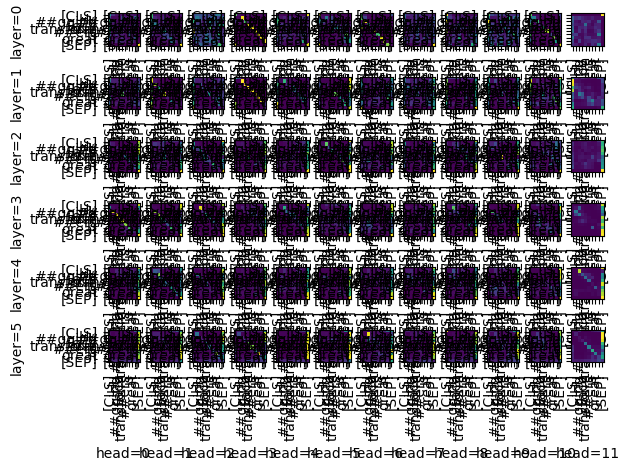

In [26]:
tokens = tokenizer.convert_ids_to_tokens(model_inputs.input_ids[0])
print(tokens)

n_layers = len(model_outputs.attentions)
n_heads = len(model_outputs.attentions[0][0])
fig, axes = plt.subplots(6, 12)
for layer in range(n_layers):
    for i in range(n_heads):
        axes[layer, i].imshow(model_outputs.attentions[layer][0, i])
        axes[layer][i].set_xticks(list(range(10)))
        axes[layer][i].set_xticklabels(labels=tokens, rotation='vertical')
        axes[layer][i].set_yticks(list(range(10)))
        axes[layer][i].set_yticklabels(labels=tokens)
        
        if layer == 5:
            axes[layer, i].set(xlabel=f"head={i}")
        if i == 0:
            axes[layer, i].set(ylabel=f"layer={layer}")
            
plt.subplots_adjust(wspace=0.3)
plt.show()

In [27]:
# fine tuning

from datasets import load_dataset, DatasetDict

imdb_dataset = load_dataset('imdb')

